In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.datasets
import sklearn.linear_model
from sklearn.preprocessing import LabelEncoder

In [2]:
#Charger les données
training_data = pd.read_csv("Training.csv")
testing_data = pd.read_csv("Testing.csv")

dim_Train = training_data.shape
dim_Test = testing_data.shape

print("La dimension du training_data est :", dim_Train)
print("La dimension du testing_data est :", dim_Test)

La dimension du training_data est : (4920, 134)
La dimension du testing_data est : (42, 133)


In [3]:
derniere_colonne = training_data.iloc[:, 133]
print("Dernière colonne par indice est :\n", derniere_colonne)

#Noms des colonnes de notre dataset
print(training_data.columns)

valeurs_uniques = training_data['Unnamed: 133'].unique()
print(valeurs_uniques) #la colonne "Unnamed: 133" contient que des Na

#Suppression de la colonne "Unnamed: 133", car elle contient que des Na
training_data = training_data.drop(columns=['Unnamed: 133'])

Dernière colonne par indice est :
 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4915   NaN
4916   NaN
4917   NaN
4918   NaN
4919   NaN
Name: Unnamed: 133, Length: 4920, dtype: float64
Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)
[nan]


In [4]:
print(training_data.head())

#liste des différentes classes (maladies)
valeurs_uniques = training_data['prognosis'].unique()
print(valeurs_uniques.shape) #42 maladies
#Occurrences de chaque classe
nb_valeurs_uniques = training_data['prognosis'].value_counts()
print(nb_valeurs_uniques)

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [5]:
train_data = training_data.iloc[:,0:132]
Y = training_data.iloc[:,132]
x = train_data.shape[0]
y = train_data.shape[1]
print(x, y)
print(Y.shape)

4920 132
(4920,)


In [6]:
# Initialisation des poids et biais avec 128 neurones
def initialisation(nb_neurone, nb_classes):
    w = np.zeros((y, nb_neurone))
    b = np.zeros((1, nb_neurone))
    v = np.zeros((nb_neurone, nb_classes))
    c = np.zeros((1, nb_classes))
    return w, b, v, c

    # 'w' et 'b' représentent les poids et le biais associés à la couche cachée.
    # 'v' et 'c' représentent les poids et le biais associés à la couche de sortie.

In [7]:
#Inialisation avec 128 neurones
w, b, v, c = initialisation(128,42) #42 clasess(maladies)
print(w.shape)
print(b.shape)
print(v.shape)
print(c.shape)

(132, 128)
(1, 128)
(128, 42)
(1, 42)


In [8]:
# Fonction d'activation sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
# Fonction d'activation softmax
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Pour la stabilité numérique
    return exp_z / exp_z.sum(axis=1, keepdims=True)

In [10]:
# Fonction de modèle
def model(train_data, w, b, v, c):
    Z1 = np.dot(train_data, w) + b
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, v) + c
    A2 = softmax(Z2)
    return A2

In [11]:
# Fonction de coût
def compute_cost(A, Y):
    m = Y.shape[0]
    epsilon = 1e-15
    A = np.maximum(epsilon, A)
    cost = -1/m * np.sum(Y * np.log(A))
    return cost

In [12]:
## Propagation (Forward et Backward)
def propagate(w, b, v, c, X, Y):
    m = X.shape[0]

    # Forward Propagation
    Z1 = np.dot(X, w) + b
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, v) + c
    A2 = softmax(Z2)

    # Calcul du coût
    cost = compute_cost(A2, Y)

    # Backward Propagation
    dZ2 = A2 - Y
    dv = 1/m * np.dot(A1.T, dZ2)
    dc = 1/m * np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, v.T) * A1 * (1 - A1)
    dw = 1/m * np.dot(X.T, dZ1)
    db = 1/m * np.sum(dZ1, axis=0, keepdims=True)

    return dw, db, dv, dc, cost

In [13]:
# Optimisation
def optimize(w, b, v, c, X, Y, num_iterations, learning_rate):
    costs = []

    for i in range(num_iterations):
        dw, db, dv, dc, cost = propagate(w, b, v, c, X, Y)

        # Mise à jour des poids et biais
        w -= learning_rate * dw
        b -= learning_rate * db
        v -= learning_rate * dv
        c -= learning_rate * dc

        # Enregistrement du coût à chaque 100 itérations
        if i % 100 == 0:
            costs.append(cost)

    return w, b, v, c, costs

In [14]:
# Prédiction
def predict(w, b, v, c, X):
    A = model(X, w, b, v, c)
    predictions = np.argmax(A, axis=1)
    return predictions

In [15]:
# Ajouter cette fonction pour calculer la précision
def calculate_accuracy(predictions, true_labels):
    return accuracy_score(true_labels, predictions)
# Modèle complet
def model_complete(X_train, Y_train, num_iterations=2000, learning_rate=0.01, nb_classes=42):
    w, b, v, c = initialisation(128, nb_classes)

    # Encodage one-hot des étiquettes
    Y_one_hot = np.eye(nb_classes)[Y_train.astype(int).reshape(-1)]

    # Optimisation des poids et biais
    w, b, v, c, costs = optimize(w, b, v, c, X_train, Y_one_hot, num_iterations, learning_rate)

    return w, b, v, c, costs

In [16]:
# Séparation des features et des étiquettes pour l'entraînement
X_train = train_data.values
Y_train = Y.values

# Créer un objet LabelEncoder
label_encoder = LabelEncoder()

# Adapter et transformer les étiquettes de classe dans Y_train
Y_train_encoded = label_encoder.fit_transform(Y_train)

In [17]:
print(testing_data.shape)

(42, 133)


In [19]:
# Appeler la fonction model_complete avec les étiquettes encodées
w, b, v, c, costs = model_complete(X_train, Y_train_encoded,num_iterations=400000, learning_rate=0.5, nb_classes=42)

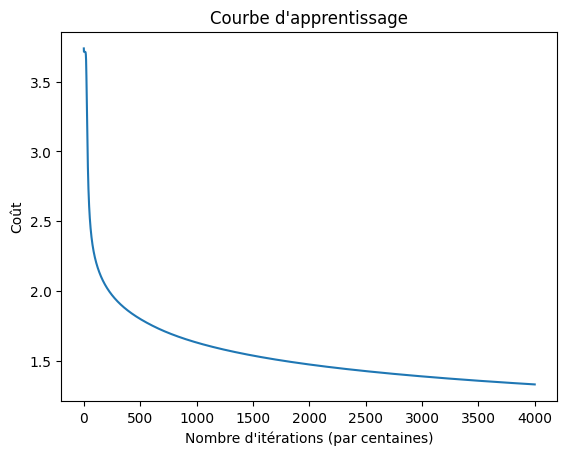

In [20]:
# Affichage de la courbe d'apprentissage
plt.plot(costs)
plt.xlabel("Nombre d'itérations (par centaines)")
plt.ylabel("Coût")
plt.title("Courbe d'apprentissage")
plt.show()

In [21]:
# Charger les données de test (remplacez "X_test" par vos données de test)
X_test = testing_data.iloc[:, 0:132]

# Utiliser la fonction model pour obtenir les probabilités du modèle
probabilities = model(X_test, w, b, v, c)

# Afficher les probabilités
print(probabilities)

# Utiliser la fonction predict pour obtenir les prédictions du modèle
predictions = predict(w, b, v, c, X_test)

# Afficher les prédictions
print(predictions)

[[2.08864155e-05 2.88962706e-03 1.31655961e-03 ... 1.29969887e-01
  3.90678106e-39 2.43188871e-15]
 [1.40879223e-02 1.52669206e-01 2.00320074e-08 ... 1.05336397e-01
  1.86453149e-32 1.24034839e-16]
 [3.19732276e-03 7.56256357e-02 1.00264258e-06 ... 1.87709186e-01
  2.79686720e-34 5.15896462e-16]
 ...
 [4.66401191e-18 7.26509467e-14 4.47867083e-02 ... 7.57015050e-09
  6.31406590e-59 2.39346627e-20]
 [8.46489302e-05 7.76876488e-03 3.12541203e-04 ... 1.78234924e-01
  6.60662105e-38 2.13563372e-15]
 [2.65817660e-03 6.83829994e-02 1.48989453e-06 ... 1.94805745e-01
  1.73576861e-34 5.86537781e-16]]
[15  4 16  9 14 33  1 12  0 34 23 26 35 32 28 10  8 11 37 40 19  9 19 22
  8 36 10 34 13 18 39 26 24 25 31 24  0 23  2 35 27 16]


In [22]:
# Extraire la colonne "prognosis" pour obtenir la liste des noms de maladies
liste_maladies = training_data['prognosis'].unique()

# Créer un dictionnaire de correspondance entre les noms de maladies et les indices (classes)
dict_maladies_indices = {maladie: indice for indice, maladie in enumerate(liste_maladies)}

# Utiliser le dictionnaire pour mapper les prédictions aux noms de maladies
noms_maladies_predites = [liste_maladies[prediction] for prediction in predictions]

# Afficher les noms des maladies prédites
print(noms_maladies_predites)

['Malaria', 'Drug Reaction', 'Chicken pox', 'Bronchial Asthma', 'Jaundice', 'Hypoglycemia', 'Allergy', 'Cervical spondylosis', 'Fungal infection', 'Osteoarthristis', 'Hepatitis E', 'Common Cold', 'Arthritis', 'Hyperthyroidism', 'Dimorphic hemmorhoids(piles)', 'Hypertension ', 'Gastroenteritis', 'Migraine', 'Acne', 'Impetigo', 'hepatitis A', 'Bronchial Asthma', 'hepatitis A', 'Hepatitis D', 'Gastroenteritis', '(vertigo) Paroymsal  Positional Vertigo', 'Hypertension ', 'Osteoarthristis', 'Paralysis (brain hemorrhage)', 'Typhoid', 'Psoriasis', 'Common Cold', 'Alcoholic hepatitis', 'Tuberculosis', 'Hypothyroidism', 'Alcoholic hepatitis', 'Fungal infection', 'Hepatitis E', 'GERD', 'Arthritis', 'Pneumonia', 'Chicken pox']


Training with learning rate: 0.1

-------------------------------------------------------

Training with learning rate: 0.5

-------------------------------------------------------



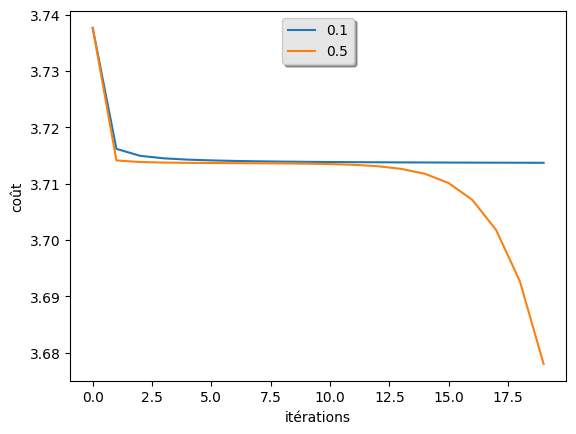

In [ ]:
learning_rates = [0.1, 0.5]
models = {}

for rate in learning_rates:
    print("Training with learning rate:", rate)

    # Encodage des étiquettes de classe en entiers
    label_encoder = LabelEncoder()
    Y_train_encoded = label_encoder.fit_transform(Y_train)

    # Appeler la fonction model_complete avec les étiquettes encodées
    w, b, v, c, costs = model_complete(X_train, Y_train_encoded,num_iterations=2000, learning_rate=rate)
    models[str(rate)] = {
        "parameters": {"w": w, "b": b, "v": v, "c": c},
        "costs": costs,
        "learning_rate": rate
    }

    print('\n' + "-------------------------------------------------------" + '\n')

# Visualisation des courbes d'apprentissage
for rate in learning_rates:
    plt.plot(np.squeeze(models[str(rate)]["costs"]), label=str(models[str(rate)]["learning_rate"]))

plt.ylabel('coût')
plt.xlabel('itérations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()


In [23]:
def calculate_accuracy(predictions, labels):
    correct_predictions = np.sum(predictions == labels)
    total_examples = len(labels)
    accuracy = correct_predictions / total_examples
    return accuracy



# Utilisation de la fonction de prédiction sur les données d'entraînement
train_predictions = predict(w, b, v, c, X_train)

# Calcul de la précision sur les données d'entraînement
train_accuracy = calculate_accuracy(train_predictions, Y_train_encoded)
print(f"Précision sur l'ensemble d'entrainement: {train_accuracy:.2%}")


Précision sur l'ensemble d'entrainement: 64.88%


In [24]:
# Utilisation de la fonction de prédiction sur les données de test
X_test = testing_data.iloc[:, 0:132]
Y_test = label_encoder.transform(testing_data['prognosis'])

test_predictions = predict(w, b, v, c, X_test)

# Calcul de la précision sur les données de test
test_accuracy = calculate_accuracy(test_predictions, Y_test)
print(f"Précision sur l'ensemble de test : {test_accuracy:.2%}")

Précision sur l'ensemble de test : 71.43%
